<a href="https://colab.research.google.com/github/SamarjeetKaur/ML/blob/master/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf

In [0]:
import numpy as np
import matplotlib.pyplot as plt
(x_train,y_train),(x_test,y_test)= tf.keras.datasets.fashion_mnist.load_data()

In [3]:
print("x_train shape:" ,x_train.shape , "y_train shape:", y_train.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)


In [0]:
#normalise
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255

In [0]:
#train and validation split
from sklearn.model_selection import train_test_split
train_X,valid_X,train_ground,valid_ground = train_test_split(x_train,y_train,test_size=0.2)

In [8]:
print(train_ground.shape)

(48000,)


In [9]:
model =tf.keras.Sequential()
#define input shape
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=2,padding='same',activation='relu',input_shape=(28,28,1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
# Take a look at the model summary
model.summary()

W0707 06:10:13.884440 139806177343360 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0

In [10]:
# Reshape input data from (28, 28) to (28, 28, 1)
w, h = 28, 28
train_X = train_X.reshape(train_X.shape[0], w, h, 1)
valid_X = valid_X.reshape(valid_X.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

# One-hot encode the labels
train_ground = tf.keras.utils.to_categorical(train_ground, 10)
valid_ground = tf.keras.utils.to_categorical(valid_ground, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

print(valid_ground.shape)

(12000, 10)


In [0]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [13]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
model.fit(train_X,
         train_ground,
         batch_size=64,
         epochs=10,
         validation_data=(valid_X, valid_ground),
         callbacks=[checkpointer])

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
47936/48000 [============================>.] - ETA: 0s - loss: 0.6284 - acc: 0.7686
Epoch 00001: val_loss improved from inf to 0.41234, saving model to model.weights.best.hdf5
48000/48000 [==============================] - 67s 1ms/sample - loss: 0.6283 - acc: 0.7686 - val_loss: 0.4123 - val_acc: 0.8568
Epoch 2/10
47936/48000 [============================>.] - ETA: 0s - loss: 0.4363 - acc: 0.8404
Epoch 00002: val_loss improved from 0.41234 to 0.37016, saving model to model.weights.best.hdf5
48000/48000 [==============================] - 66s 1ms/sample - loss: 0.4361 - acc: 0.8405 - val_loss: 0.3702 - val_acc: 0.8662
Epoch 3/10
47936/48000 [============================>.] - ETA: 0s - loss: 0.3917 - acc: 0.8583
Epoch 00003: val_loss improved from 0.37016 to 0.32548, saving model to model.weights.best.hdf5
48000/48000 [==============================] - 65s 1ms/sample - loss: 0.3916 - acc: 0.8583 - val_loss: 0.3255 - val_acc: 0.88

In [0]:
# Load the weights with the best validation accuracy
model.load_weights('model.weights.best.hdf5')

In [15]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9029


In [0]:
# Define the text labels
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9

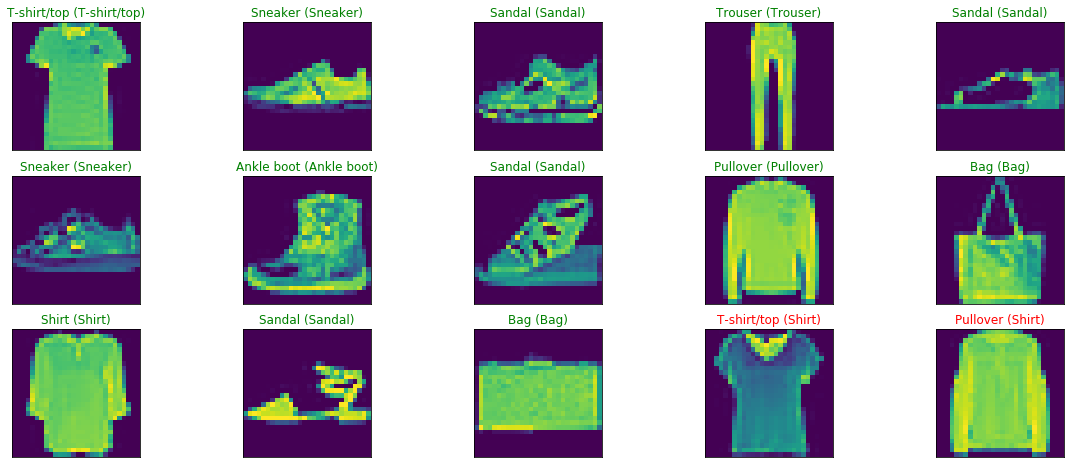

In [18]:
y_hat = model.predict(x_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))